In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
moons = make_moons(n_samples=200,noise=0.2,random_state=0)
x = moons[0]
y = moons[1]

In [3]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(model,x,y,margin=0.3):
    _x1 = np.linspace(x[:,0].min()-margin,x[:,0].max()+margin,100)
    _x2 = np.linspace(x[:,1].min()-margin,x[:,1].max()+margin,100)
    x1,x2 = np.meshgrid(_x1,_x2)
    x_new = np.c_[x1.ravel(),x2.ravel()]
    y_pred = model.predict(x_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['mediumblue','orangered'])
    plt.contourf(x1,x2,y_pred,alpha=0.3,cmap=custom_cmap)

def plot_dataset(x,y):
    plt.plot(x[:,0][y==0],x[:,1][y==0],'bo',ms=15)
    plt.plot(x[:,0][y==1],x[:,1][y==1],'r^',ms=15)
    plt.xlabel("$x_0$",fontsize=30)
    plt.ylabel("$x_1$",fontsize=30,rotation=0)

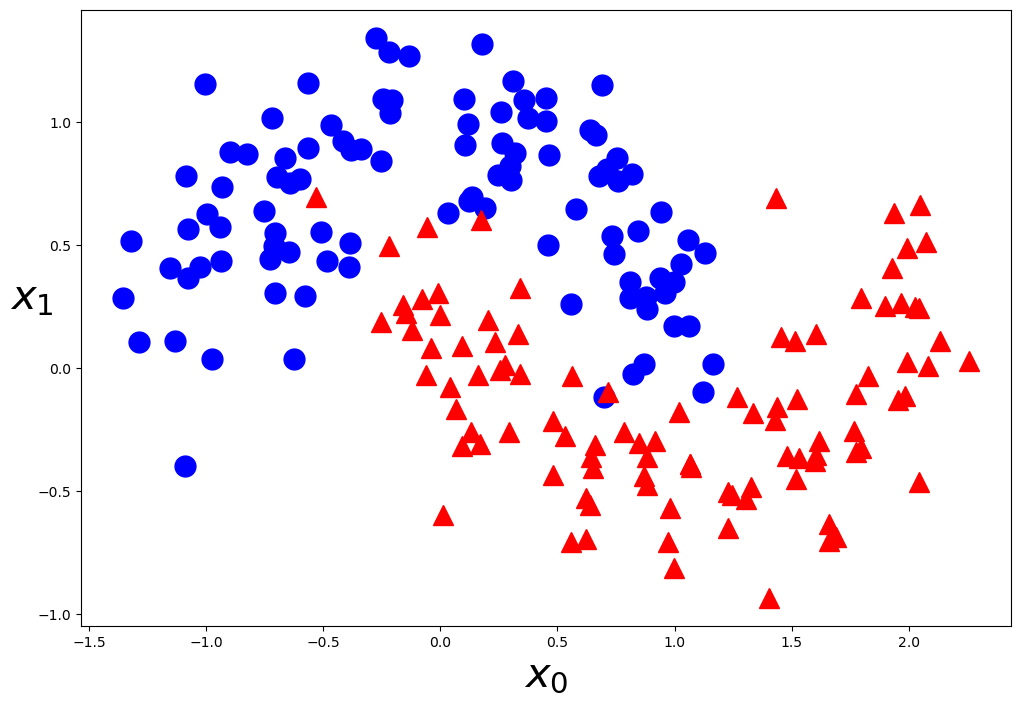

In [4]:
plt.figure(figsize=(12,8))
plot_dataset(x,y)
plt.show()

In [5]:
# データを任意数分割してみる

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [9]:
# LogisticRegression実行
log_reg = LogisticRegression().fit(x_train,y_train)

# DecisionTreeClassifier実行
tree_clf = DecisionTreeClassifier().fit(x_train,y_train)

# このまま正解率を評価するのは好ましくない。
# トレーニング用、テスト用のデータの分割次第で正解率が異なる可能性がある。
print("LogisticRegression={:.2f}".format(log_reg.score(x_test,y_test)))
print("DecisionTreeClassifier={:.2f}".format(tree_clf.score(x_test,y_test)))

LogisticRegression=0.84
DecisionTreeClassifier=0.98


In [10]:
from sklearn.model_selection import KFold,cross_val_score

In [12]:
# データを分割する関数 n_splits=5で分割数を5個とする
kfold = KFold(n_splits=5,shuffle=True,random_state=0)

# cross_val_score(モデル,データ,正解ラベル,分割数)
log_reg_score = cross_val_score(log_reg,x,y,cv=kfold)
tree_clf_score = cross_val_score(tree_clf,x,y,cv=kfold)

print(log_reg_score) # 誤差10%くらい
print(tree_clf_score) # 誤差5%くらい

[0.85  0.875 0.875 0.825 0.775]
[0.975 0.925 0.95  0.95  0.925]


In [13]:
print("LogisticRegression={:.2f}".format(log_reg_score.mean()))
print("DecisionTreeClassifier={:.2f}".format(tree_clf_score.mean()))

LogisticRegression=0.84
DecisionTreeClassifier=0.94


In [14]:
# 混合行列を取得してみる

from sklearn.metrics import confusion_matrix

In [16]:
# 予測値を算出
y_pred_log_reg = log_reg.predict(x_test)
y_pred_tree_clf = tree_clf.predict(x_test)

# 混合行列を取得
cm_log_reg = confusion_matrix(y_test,y_pred_log_reg)
cm_tree_clf = confusion_matrix(y_test,y_pred_tree_clf)

print(cm_log_reg)
print("\n")
print(cm_tree_clf)

[[23  5]
 [ 3 19]]


[[28  0]
 [ 1 21]]


In [17]:
# 混合行列を用いて様々な評価基準を表示してみる
# precision_score: 適合率
# recall_score: 再現率
# f1_score: F値

from sklearn.metrics import precision_score,recall_score,f1_score

In [18]:
# 適合率
print("precision log_reg:\n",precision_score(y_test,y_pred_log_reg))
print("\n")
print("precision tree_clf:\n",precision_score(y_test,y_pred_tree_clf))

precision log_reg:
 0.7916666666666666


precision tree_clf:
 1.0


In [19]:
# 再現率
print("recall log_reg:\n",recall_score(y_test,y_pred_log_reg))
print("\n")
print("recall tree_clf:\n",recall_score(y_test,y_pred_tree_clf))

recall log_reg:
 0.8636363636363636


recall tree_clf:
 0.9545454545454546


In [20]:
# F値
print("f1 log_reg:\n",f1_score(y_test,y_pred_log_reg))
print("\n")
print("f1 tree_clf:\n",f1_score(y_test,y_pred_tree_clf))

f1 log_reg:
 0.8260869565217391


f1 tree_clf:
 0.9767441860465117


In [21]:
# 適合率、再現率のトレードオフの関係を確認する
from sklearn.metrics import precision_recall_curve

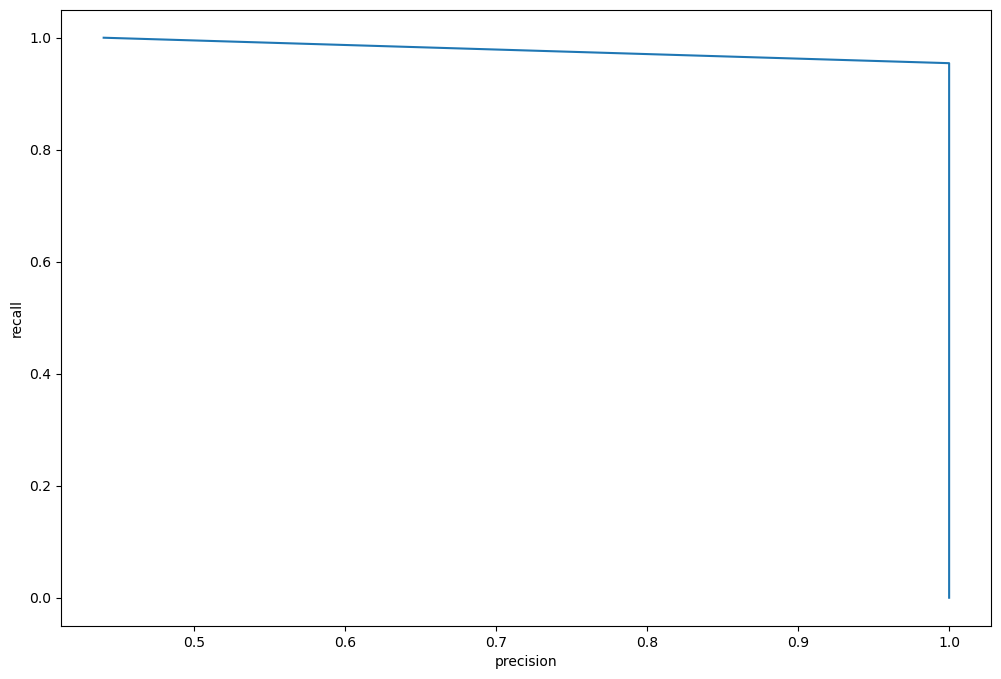

In [22]:
# DecisionTreeClassifier
precision,recall,threshold = precision_recall_curve(y_test,y_pred_tree_clf)

plt.figure(figsize=(12,8))
plt.plot(precision,recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()

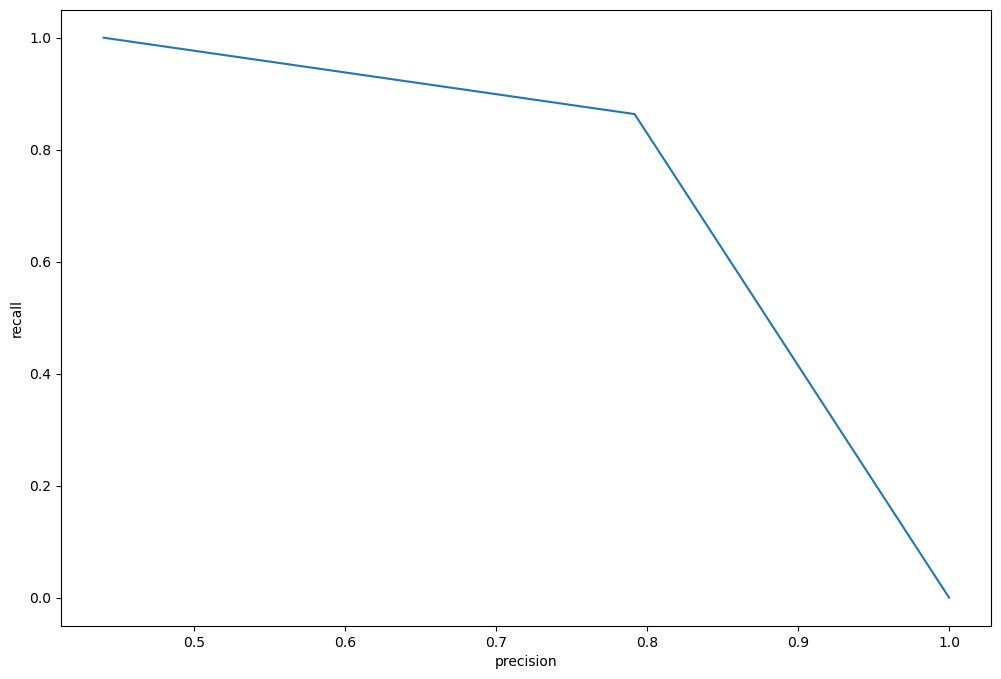

In [23]:
# LogisticRegression
precision,recall,threshold = precision_recall_curve(y_test,y_pred_log_reg)

plt.figure(figsize=(12,8))
plt.plot(precision,recall)
plt.xlabel("precision")
plt.ylabel("recall")
plt.show()


In [24]:
# 平均二乗誤差とR誤差について確認する

from mglearn.datasets import make_wave

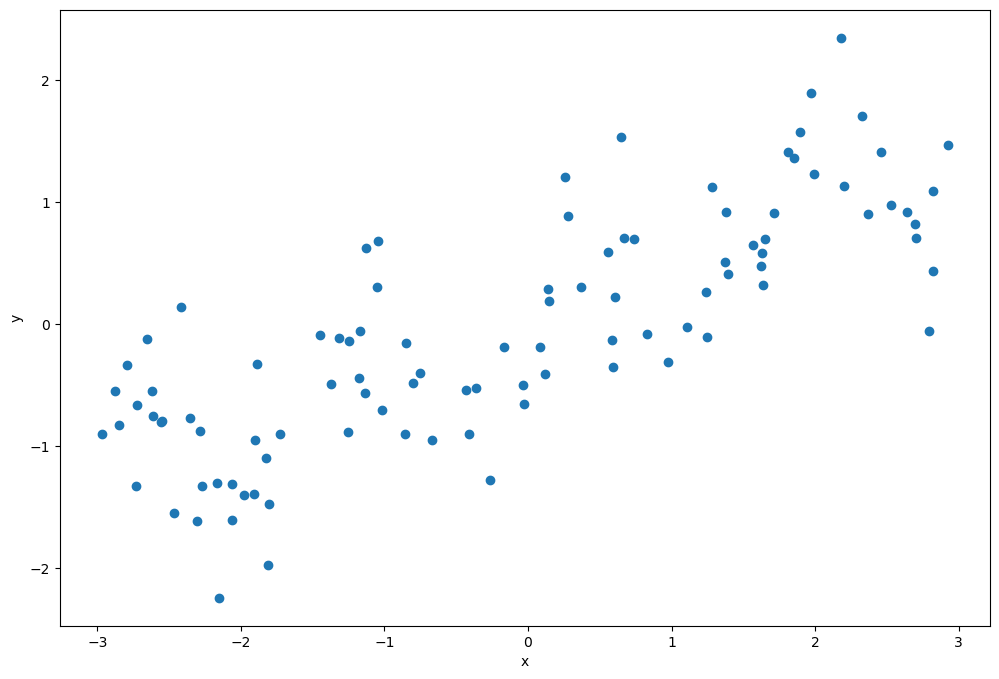

In [25]:
x,y = make_wave(n_samples=100)

plt.figure(figsize=(12,8))
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [26]:
# 線形回帰を実行してみる

from sklearn.linear_model import LinearRegression

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)
lin_reg = LinearRegression().fit(x_train,y_train)

In [28]:
# R^2の値
print(lin_reg.score(x_test,y_test))

0.621210114749764


In [30]:
# 平均二乗誤差
from sklearn.metrics import mean_squared_error

# 予測値
y_pred = lin_reg.predict(x_test)

mse = mean_squared_error(y_test,y_pred)
mse

0.3621150673476498

In [31]:
rmse = np.sqrt(mse)
rmse

0.6017599748634416